## Using Principles of Game Theory to Analyze McLaren's Decision Making During the 2020 Season
### Andrew Defante
#### andrew.defante1@gmail.com


#### Intro to Formula 1

For those unfamiliar, Formula 1 (F1) is the pinnacle of motorsport and racing; the fastest cars, the best drivers, high-profile companies and personnel involved competing across the globe every other weekend.

As it stands now (pre-2022 regulation overhaul), F1 does not operate on a level playing field. 10 teams, also known as constructors (with 2 cars/drivers each) make up the series, and the teams with the most resources and backing are the ones who run (or should run) at the top of the field each Grand Prix weekend. Points are assigned to each driver finishing in the top 10. First place gets 25 points, Second 18, Third 15, with it rapidly tailing off until tenth place earning 1 point. The point earnings of the two drivers in each team combine to make up the constructors point total.

Since the V6-Hybrid era started in 2014 Mercedes AMG has dominated, winning 7 consecutive constructors championships, and the their drivers sweeping the drivers championships in the same time period (Lewis Hamilton: 2014-2015, 2017-2020, Nico Rosberg: 2016). Mercedes AMG has had resonable challengers though, with Red Bull and Ferrari chasing them down over the past few years. 

The rest of the constructors field is then split into the mid-field, followed by the backmarkers. One of Formula 1's most historic constructors, McLaren, struggled for much of the V6-Hybrid era and has regularly competed against the other midfield teams during the races. In 2017, they placed 9/10 in the championship, followed by placing 6/10 in 2018. It wasn't until 2019 that they began a resurgence, and in 2020 their progress resulted in third place in constructors championship. The momentum they have gained over the past couple of years has them poised for a strong 2021 and sets them up well for the 2022 regulation overhaul. 

#### McLaren Resurgence

But what was the source of this resurgence? A lot can be attributed to the risk they took signing the youngest driver pairing in the teams history for 2019, with Lando Norris (20) and Carlos Sainz (23). CEO Zak Brown also made numerous personnel and structural changes that set the team up for sustained long term success. It became apparent that their overall approach to the game had changed, but looking retrospectively at data from their most successful season yet, can any more insight be gained?

#### Formula 1 Strategy

There is a YouTube video published by Formula 1 including many teams strategists (https://www.youtube.com/watch?v=4CFkltWIc8o&ab_channel=FORMULA1). As said in the video, strategists are responsible for many key components leading up to the race weekend and during the weekend itself. Responsibilites include tyre selection, practice and qualifying session aims, and of course pit and race strategy during the Grand Prix itself. Strategists have to make decisions on the fly and each decision bears heavy consequences, hopefully for the better. McLaren's strategist, Randeep Singh, was featured in the video and mentioned that McLaren uses game theory and machine learning to assist in their decision making. 

I think this was particularly interesting, because I believe that using the core principles of game theory enables a strategist to make the most logical decisions under immense pressure, regardless of the time window or circumstances surrounding the situation. 

#### Game Theory... What is it?

This leads to the next question: What is game theory?
Game theory is essentially the study of strategy and decision making. There are many intricacies in attempting to study game theory itself, but focusing on some of the core principles of it may lead to insight on how McLaren found success in 2020. 

#### The principles of game theory focused on here include the following. 
###### These principles, along with others, are discussed in great detail in Simon Sinek's Book: The Infinite Game):
- Identification and evaluation of Infinite games v. Finite games
        - 
- Clear definition of values
        - 

##### With that being said, the purpose of this report is to try and answer the following questions:

   - What strategic patterns, if any, can we identify by looking at the timing data from McLaren's races in the 2020 season?
   - Do these patterns follow a consistent theme throughout the season? If so we can attribute these themes as the team's values.

- Stragegic Patterns:

     - There are plenty of things we can evaluate in terms of strategy that can possibly provide insight to how the team approaches certain situations. This includes:
        - Pre-race:
            - Qualifying Position
            - Tyre compounds being used
            - Track conditions (temperature/grip levels over use)
            - Other information carried over from practice and qualifying sessions
        - Race:
            - Start lap
            - Pit Windows
            - Responding to opponents in pit window
            - Undercut/Overcut responses
            - Inter-team priority
            - Tyre wear
            - Aggressiveness
            - Car performace
            - Safety Car Response (VSC/Red Flag)
            - Stints
        
   


#### Loading Packages and Dataset

In [31]:
import numpy as np
import scipy as sp
import pandas as pd
import plotly.express as px
from pandas import Series, DataFrame

path = 'C:/Users/andre/repo/f1_game_theory/datasets/f1_2020.csv'

full = pd.read_csv(path)
full.head()

,code,circuit,gp,raceid,position,tm,ms,lap,box,accumulated
0,AIT,Bahrain International Circuit,Sakhir Grand Prix,1046,15,1:35.051,95051,1,NaN,NaN
1,AIT,Bahrain International Circuit,Sakhir Grand Prix,1046,15,1:34.286,94286,2,NaN,95051.0
2,AIT,Bahrain International Circuit,Sakhir Grand Prix,1046,15,1:30.745,90745,3,NaN,189337.0
3,AIT,Bahrain International Circuit,Sakhir Grand Prix,1046,15,1:30.538,90538,4,NaN,280082.0
4,AIT,Bahrain International Circuit,Sakhir Grand Prix,1046,15,1:32.414,92414,5,NaN,370620.0


## Austrian GP 

Due to the COVID-19 pandemic, the 2020 Formula 1 season started on the weekend of July 3-5 at the Red Bull Ring in Spielburg, Austria. Prior to this weekend, it is important to note that testing was limited, and therefore there would be a lot of unpredictability regarding car performance and reliability.

We're going to focus more on the two McLaren Drivers: Lando Norris (NOR) and Carlos Sainz (SAI) for this race, and for the rest of the season. At this point it is also important to note McLaren's expected competition. Because this is the first race of the season, we'll use last season's standings as the benchmark.

### 2019 Standings:
#### Constructors (Drivers):
1. Mercedes (HAM/BOT)
2. Ferrari (LEC/VET)
3. Red Bull (VER/ALB)
##### Midfield
4. McLaren (NOR/SAI)
5. Renault (RIC/OCO)
6. Toro Rosso aka Alpha Tauri (GAS/KVY)
7. Racing Point (PER/STR)
##### Backmarkers
8. Alfa Romeo (RAI/GIO)
9. Haas (GRO/MAG)
10. Williams (RUS/LAT)

Looking at the standings McLaren was P4. For simplicity sake, we'll declare P4-P7 as the midfield. The obvious goal for McLaren would be to continue its placing ahead of the other midfield teams.

For this race, NOR starts on the second row in P3, with SAI a few rows behind in P8. 

In [32]:
# Starting Grid = Position on Lap 1
r1 = full[(full.raceid == 1031)]

sg_r1 = r1[(r1.lap == 1)]
sg_r1 = sg_r1[['code', 'position']]
sg_r1 = sg_r1.sort_values(by=['position'])
sg_r1

,code,position
1081,BOT,1
16691,VER,2
9371,NOR,3
87,ALB,4
4772,HAM,5
11247,PER,6
7735,LEC,7
15024,SAI,8
15906,STR,9
17486,VET,10


#### Lap x Lap Time Plot

We will start analyzing the race data by looking at NOR and SAI lap times as the race progresses. This allows us to look at each driver's pace individually over the course of the race. From this we can gain insight to consitency, as well as see where the driver pushed harder on some laps (using up more fuel/higher engine mode, fresher tyres). Because F1 Cars don't refuel, the car gets lighter as the race progresses, and there is an expected downward trend in lap time as the race goes on. 

###### A note about using plotly graphs: They are interactive. You can click on the legend to view each driver specifically, and click/drag on an area of the plot to zoom in. Double click to zoom back out

In [33]:
mcl_r1 = r1[(r1.code == 'NOR') | (r1.code == 'SAI')]
mcl_r1.head()

,code,circuit,gp,raceid,position,tm,ms,lap,box,accumulated
9371,NOR,Red Bull Ring,Austrian Grand Prix,1031,3,1:14.567,74567,1,NaN,NaN
9372,NOR,Red Bull Ring,Austrian Grand Prix,1031,3,1:10.366,70366,2,NaN,74567.0
9373,NOR,Red Bull Ring,Austrian Grand Prix,1031,4,1:11.197,71197,3,NaN,144933.0
9374,NOR,Red Bull Ring,Austrian Grand Prix,1031,5,1:10.810,70810,4,NaN,216130.0
9375,NOR,Red Bull Ring,Austrian Grand Prix,1031,5,1:09.949,69949,5,NaN,286940.0


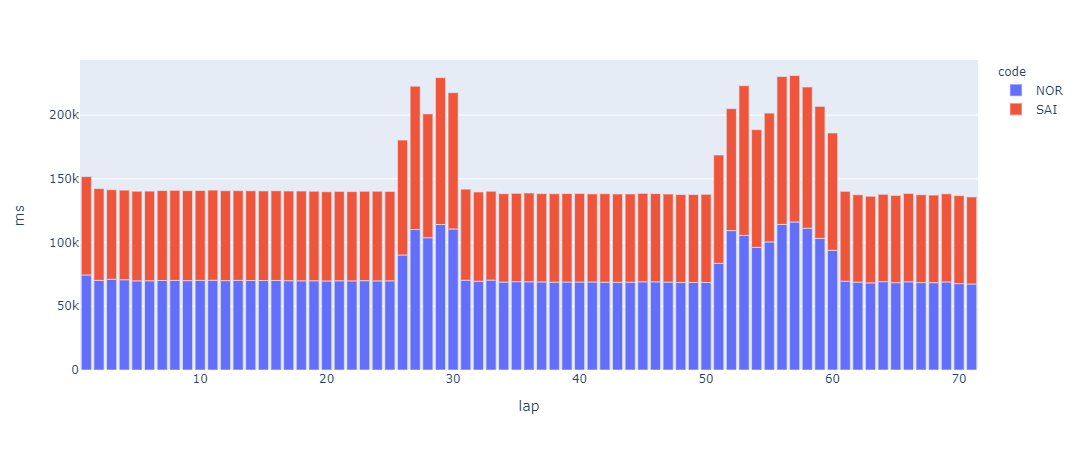

In [35]:
## Barplot to observe lap times over laps
fig = px.bar(mcl_r1, x = "lap", y = "ms", color = "code")
fig.show()

There are a few things to take away from this plot. 

#### Lap x Accumulated Milliseconds Plot

Plotting Laps against Accumulated Time allows us to observe drivers pace compared to others.

By plotting lap on the x-axis and accumulated milliseconds on the y-axis we can infer the following:
- A constant slope reflects consistent pace (i.e driver lap times are consistent over laps in lap x time units)
- A decrease in slope reflects an increase in pace (i.e driver is covering more laps in shorter amount of time)
    - By calculating the slope using upper and lower bounds (laps), we can get a sense of the pace during those laps
- We can identify pit windows by looking for increases in slope. This window can allow teams and drivers to gain ground on opponents, or increase the gap between them and the opponents behind them. 
    - Additionally, we can identify how a driver responds before/after they box as well as being subject to undercut/overcuts
- We can consider each driver's curve as a function, and therefore use the integral (with upper/lower bounds being laps) to calculate area under the curve (AUC) and compare the lap x time deltas between multiple drivers. Additionally, if we consider lap = distance, the AUC reflects speed squared.

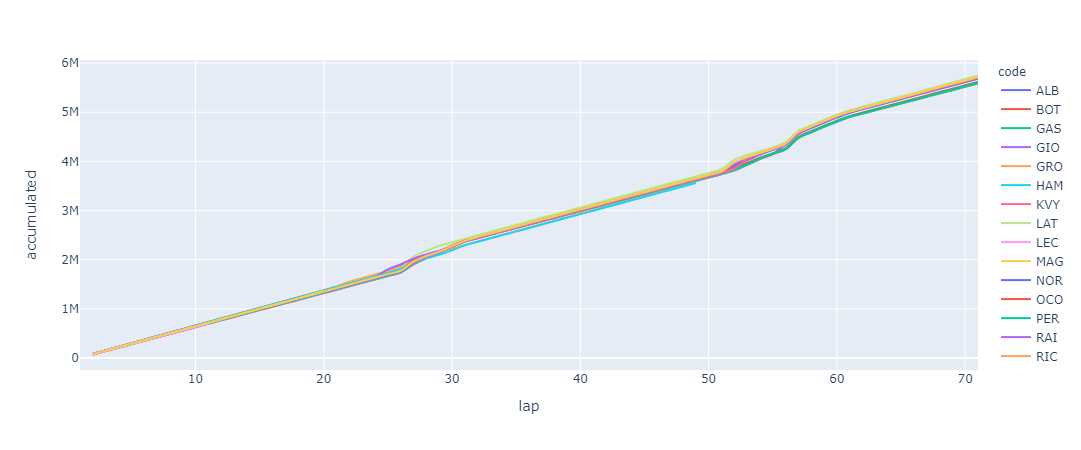

In [37]:
fig = px.line(r1, x = "lap", y = "accumulated", color = "code", line_shape="spline", render_mode="svg")
fig.show()

Looking at the plot above including all drivers: 
- The first window took place between lap 20-30, as we see driver lines start to deviate from the group. Driver lines who have an increase in slope earlier undercut those who have an increase in slope later. 
- The second window took place between lap 50-60, with two sets of stops. This set up for a crucial last stage of the race.

### Sainz and Norris Comparison

To gain more detailed insight, we start by filtering the data to the two McLaren drivers; Carlos Sainz and Lando Norris.
- We can then compare respective pace, and see how pit strategies are approached within the team

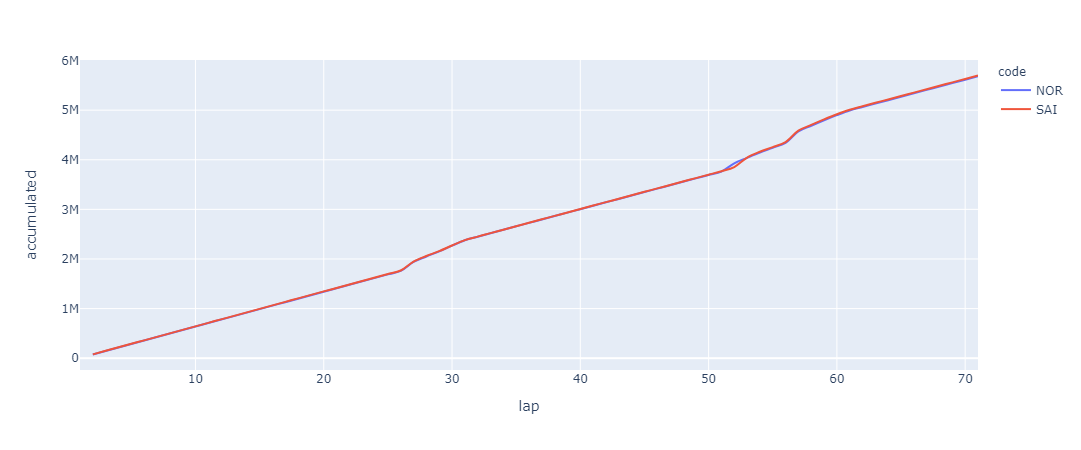

In [38]:
mcl_r1_df = mcl_r1

fig = px.line(mcl_r1_df, x = "lap", y = "accumulated", color = "code", line_shape="spline", render_mode="svg")
fig.show()

At initial glance, the pace of the two drivers looks rather identical. There aren't any noticeable deviations until ~lap 52. Based off the earlier increase in slope of NOR, it can be inferred that Lando pitted first followed by Carlos the following lap.
- This raises the question, what happened in the first round of stops? ~lap 26?

Looking back at the race records:
A safety car was brought out on Lap 26 after HAAS driver Kevin Magnussen had brake failure.
   - The field was neutralized and in result all drivers in the top 10 boxed. 
        - Carlos boxed on lap 26 as P7
        - Lando boxed on lap 26 as P4
        - Both drivers held the same position post box
       
       
   - This explains the increase in slope on the same lap for both drivers


Another safety car was brought out on Lap 51, following George Russell's retirement
   - Carlos boxed on lap 52
        - Left field as P5
        - Re-joined field as P9
 
 
   - Lando boxed on lap 51
        - Left field as P5
        - Re-joined field as P6


Yet another safety car was brought out on Lap 56
   - Carlos boxed on lap 56
        - Left field as P8


   - Lando boxed on lap 56 as
        - Left field as P5
        
   - Both drivers held positions upon returning to field
   
        
However at this point, Lewis Hamilton was assigned a 10 second penalty for his incident with Alex Albon. Hamilton in P2, also boxed on lap 56 for his second stop, and re-joined the field as P2 before the 10 second penalty was applied. This set up drivers within 10 seconds of Hamilton to move up a place for the final result.
s

In [40]:
https://plotly.com/python/filled-area-plots/

SyntaxError: invalid syntax (<ipython-input-40-650b9b379ec4>, line 1)